Near focus: 1.88 m, Far focus: 2.14 m, DOF: 0.26 m


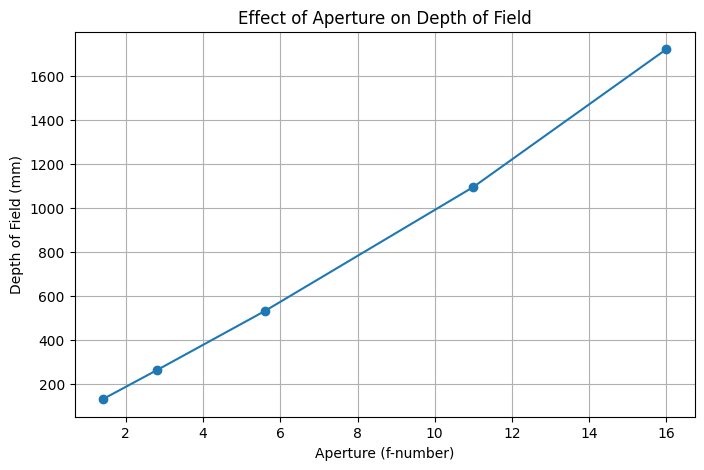

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Aperture Effect
def depth_of_field(f, N, c, d):
    """Compute near DOF, far DOF, and total DOF"""
    H = (f**2) / (N * c) + f  # Hyperfocal distance
    near = (H * d) / (H + (d - f))
    far = (H * d) / (H - (d - f)) if d < H else np.inf
    return near, far, far - near if far != np.inf else np.inf

# Example: 50mm lens, f/2.8, full-frame sensor
f = 50       # focal length (mm)
N = 2.8      # aperture (f-number)
c = 0.03     # CoC for full-frame
d = 2000     # subject distance (mm) = 2 m

near, far, dof = depth_of_field(f, N, c, d)
print(f"Near focus: {near/1000:.2f} m, Far focus: {far/1000:.2f} m, DOF: {dof/1000:.2f} m")


# Aperture Effect Visualization

apertures = [1.4, 2.8, 5.6, 11, 16]
dof_values = [depth_of_field(f, N, c, d)[2] for N in apertures]

plt.figure(figsize=(8,5))
plt.plot(apertures, dof_values, marker='o')
plt.title("Effect of Aperture on Depth of Field")
plt.xlabel("Aperture (f-number)")
plt.ylabel("Depth of Field (mm)")
plt.grid(True)
plt.show()

Object width in pixels: 300.00 px
Pixel resolution: 0.200 mm/pixel


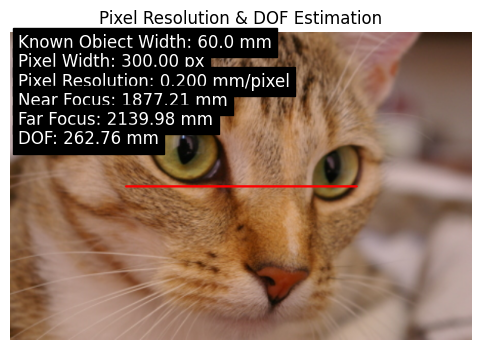

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load image
image_rgb = cv2.resize(data.chelsea(), (600, 400))  # Placeholder image

# Input known object width (mm)
known_width_mm = 60.0  # Replace with actual object width in mm


# Using placeholder coordinates as interactive input is not supported
x1, y1 = 150, 200  # Example coordinates
x2, y2 = 450, 200  # Example coordinates


# Measure object width in pixels
object_pixel_width = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
print(f"Object width in pixels: {object_pixel_width:.2f} px")

# Compute pixel resolution
pixel_resolution = known_width_mm / object_pixel_width  # mm/pixel
print(f"Pixel resolution: {pixel_resolution:.3f} mm/pixel")

# Compute Depth of Field
def depth_of_field(f, N, c, d):
    H = (f**2) / (N * c) + f  # Hyperfocal distance
    near = (H * d) / (H + (d - f))
    far = (H * d) / (H - (d - f)) if d < H else np.inf
    return near, far, far - near if far != np.inf else np.inf

focal_length_mm = 50.0         # Example focal length (mm)
aperture_N = 2.8               # f-number
subject_distance_mm = 2000.0   # Distance to object (mm)
c_mm = 0.03                    # Circle of Confusion for full-frame (mm)

near, far, dof = depth_of_field(focal_length_mm, aperture_N, c_mm, subject_distance_mm)

# Display annotated image
plt.figure(figsize=(6, 4))
annotated_img = image_rgb.copy()
cv2.line(annotated_img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
cv2.rectangle(annotated_img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

plt.imshow(annotated_img)
plt.title("Pixel Resolution & DOF Estimation")
plt.axis("off")
plt.text(10, 20, f"Known Object Width: {known_width_mm} mm", color='white', fontsize=12, backgroundcolor='black')
plt.text(10, 45, f"Pixel Width: {object_pixel_width:.2f} px", color='white', fontsize=12, backgroundcolor='black')
plt.text(10, 70, f"Pixel Resolution: {pixel_resolution:.3f} mm/pixel", color='white', fontsize=12, backgroundcolor='black')
plt.text(10, 95, f"Near Focus: {near:.2f} mm", color='white', fontsize=12, backgroundcolor='black')
plt.text(10, 120, f"Far Focus: {far:.2f} mm", color='white', fontsize=12, backgroundcolor='black')
plt.text(10, 145, f"DOF: {dof:.2f} mm", color='white', fontsize=12, backgroundcolor='black')
plt.show()